<a href="https://colab.research.google.com/github/handochan/PetitionWor2vec/blob/master/%EA%B5%AD%EB%AF%BC%EC%B2%AD%EC%9B%90_doc2vec_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
import matplotlib.font_manager as fm
import warnings
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
mpl.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
warnings.filterwarnings('ignore')

In [0]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 

Selecting previously unselected package fonts-nanum.
(Reading database ... 144467 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [0]:
!pip install soynlp
!pip show soynlp

     |████████████████████████████████| 419kB 3.3MB/s 
Name: soynlp
Version: 0.0.493
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /usr/local/lib/python3.6/dist-packages
Requires: scikit-learn, numpy, psutil, scipy
Required-by: 


In [0]:
# !pip install gensim
!pip show gensim

Name: gensim
Version: 3.6.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPLv2.1
Location: /usr/local/lib/python3.6/dist-packages
Requires: six, smart-open, numpy, scipy
Required-by: 


In [0]:
petitions = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])
petitions.shape

(395547, 8)

In [0]:
df = petitions.loc[(petitions['votes'] > 1000) & (petitions['votes'] < 100000)].copy()
df.reset_index(drop=True,inplace=True)
df_100 = df[0:100]

In [0]:
df_100

,article_id,start,end,answered,votes,category,title,content
0,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
1,43,2017-08-19,2017-09-18,0,11293,육아/교육,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된..."
2,46,2017-08-19,2017-09-18,0,1933,육아/교육,기간제교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된..."
3,50,2017-08-19,2017-10-18,0,1251,일자리,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...
4,61,2017-08-19,2017-08-26,0,1185,일자리,영어회화전문강사제도는 유지되어야합니다.,1. 영전강의고용안정을 원합니다\n2.1년단위계약직으로 임신 출산육아 매우 곤란합니...
...,...,...,...,...,...,...,...,...
95,14263,2017-09-18,2017-10-18,0,1185,보건복지,한부모가족의 행복을 보장해주세요,"2012년 이혼후 12살,10살 딸을 양육하고 있는 한부모가정의 엄마입니다.\n이혼..."
96,14347,2017-09-18,2017-10-18,0,1283,육아/교육,유치원 회계감사 제대로 해주세요,두아이에 엄마입니다\n앞으로 몇년을 더 유치원을 보내는 입장으로\n이번일에 화가 많...
97,14350,2017-09-18,2017-10-18,0,7835,보건복지,장애인활동보조,지금장애인활동보조는 부모나직계가족은안되고있어요\n맞벌이를해야하거나 활동보조를못구하면...
98,14390,2017-09-18,2017-10-18,0,1274,안전/환경,부천 특고압 설치 민원으로 보는 문제점 (국책사업 주민 의견 수렴 및 전자파 기준 ...,2013년부터 서울/경기북부 지역 전력확충을 위해 부천시를 관통하여 특고압라인을 매...


In [0]:
df2 = petitions.loc[(petitions['votes']> 100)].copy()
df2.reset_index(drop=True,inplace=True)
df2

,article_id,start,end,answered,votes,category,title,content
0,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
1,34,2017-08-19,2017-09-18,0,679,기타,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...
2,37,2017-08-19,2017-09-18,0,415,기타,황우석박사님 연구재개 허용 촉구합니다.,국민의 70% 이상이 황우석박사님을 응원하고 지지하고 있습니다.\n*2007년 1월...
3,40,2017-08-19,2017-09-18,0,218,외교/통일/국방,국가유공자등 예우및 지우너에 관한 법률 시행령 개정,지금부터 67년전 1950년 6.25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...
4,41,2017-08-19,2017-09-18,0,227,외교/통일/국방,국가유공자등 예우및 지우너에 관한 법률 시행령 개정,지금부터 67년전 1950년 6.25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...
...,...,...,...,...,...,...,...,...
18428,516826,2019-02-04,2019-03-06,0,232,행정,"대한민국 공법단체(상이군경회, 고엽제전우회(월남참전전우회포함), 특수임무유공자회 하...","1. 각기 공법단체가 따로 수익사업을 하고 있어 비리가 끝이지 않고, 전국 각 지자..."
18429,516901,2019-02-04,2019-03-06,0,718,외교/통일/국방,대한민국 예비역 장성모임(성우회)를 구성하고 있는 전직 고위장성들의 연금을 박탈하고...,올해는 3.1운동과 임시정부 수립 100주년을 맞는 해입니다. 더구나 시민들의 촛불...
18430,517037,2019-02-04,2019-03-06,0,938,인권/성평등,"군,경의 90% 남성할당제. 공정한 기회는 도대체 누구에게 주어졌습니까?","일부 공무원시험에서도, 경찰대학교나 사관학교에서도, 또한 군과 협약을 맺은 여타 고..."
18431,517038,2019-02-04,2019-03-06,0,186,인권/성평등,남성차별하는 여성가족부를 폐지하라,여성가족부 폐지 운동을 하고 있습니다. 여성가족부는 일년예산으로만 1조2천억 이라는...


In [0]:
df_id_cat=df2[['article_id','category']]
df_id_cat

,article_id,category
0,28,경제민주화
1,34,기타
2,37,기타
3,40,외교/통일/국방
4,41,외교/통일/국방
...,...,...
18428,516826,행정
18429,516901,외교/통일/국방
18430,517037,인권/성평등
18431,517038,인권/성평등


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


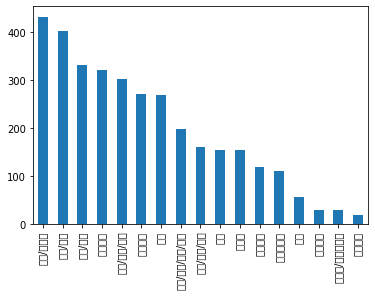

In [0]:
category_count = df['category'].value_counts()
category_count
%matplotlib inline
category_count.plot(kind='bar')

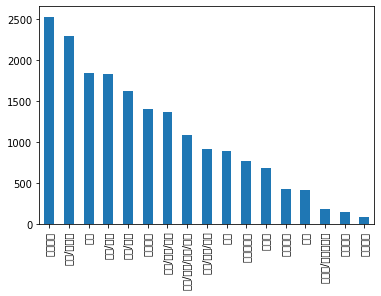

In [0]:
category_count = df2['category'].value_counts()
category_count
%matplotlib inline
category_count.plot(kind='bar')

In [0]:
sample_index = 38
sample_content = df2['content'][sample_index]
sample_title = df2['title'][sample_index]


In [0]:
def preprocessing(text):

    # 개행문자 제거
  text= str(text)
  text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
  text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
  text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
  return text
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['수', '현', '있는', '있습니다', '그', '년도', '합니다', '하는', '및', '제', '할', '하고', '더', '대한', '한', '그리고', '월', '저는', '없는', '입니다', '등', '일', '많은', '이런', '것은', '왜','같은', '같습니다', '없습니다', '위해', '한다','이', '년', '것입니다', '또한', '현재', '것이', '우리', '모든', '않고', '것을', '위한', '생각합니다', '저희', '것', '너무', '때문에', '대해', '중', '또', '다시', '아니라', '후', '바랍니다', '있도록', '아닌', '지금', '통해', '이렇게']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)
# 샘플데이터에 적용
pre_sample_content = preprocessing(sample_content)
pre_sample_content = remove_stopwords(pre_sample_content)

In [0]:
%time presentences1 = df['content'].apply(preprocessing)
%time sentences1 = presentences1.apply(remove_stopwords)

CPU times: user 347 ms, sys: 12.3 ms, total: 360 ms
Wall time: 360 ms
CPU times: user 721 ms, sys: 0 ns, total: 721 ms
Wall time: 721 ms


In [0]:
%time presentences2 = df2['content'].apply(preprocessing)
%time sentences2 = presentences2.apply(remove_stopwords)

CPU times: user 1.24 s, sys: 10.4 ms, total: 1.25 s
Wall time: 1.25 s
CPU times: user 2.66 s, sys: 5.37 ms, total: 2.67 s
Wall time: 2.67 s


In [0]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [0]:
# 전처리 이전의 샘플 텍스트로 토큰화
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['대통령님', '!', '8.2', '부동산', '대책', '소급적용', '부당성에', '대해', '청원드립니다']

In [0]:
# 전처리 이후의 샘플 텍스트로 토큰화
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:30]

['대통령님',
 '\\',
 'n',
 '취임',
 '이후',
 '어려운',
 '상황',
 '속에서도',
 '원만한',
 '국정',
 '운영을',
 '해',
 '주신',
 '점',
 '국민의',
 '한',
 '사람으로써',
 '정말',
 '감사하다는',
 '말씀',
 '드립니다',
 '.\\',
 'n',
 '오늘',
 '제가',
 '호소하고자',
 '하는',
 '내용은',
 '8.2',
 '부동산']

In [0]:
%time tokens1 = sentences1.apply(tokenizer.tokenize)
tokens1[:5]

CPU times: user 4.8 s, sys: 110 ms, total: 4.91 s
Wall time: 4.91 s


0    [존경하옵는, 문재인대통령님께, 중국원양자원이라는, KOSPI, 상장사의, 소액, ...
1    [대통령님, 안녕하세요, 임용을, 준비하고, 수험생입니다, 처음, 기간제, 정규직화...
2    [대통령님, 안녕하세요, 임용을, 준비하고, 수험생입니다, 처음, 기간제, 정규직화...
3    [안녕하십니까, 대통령님, 간단하게, 제소개, 부터, 하겠습니다, 치위생과, 학년,...
4    [영전강의고용안정을, 원합니다, 년단위계약직으로, 임신, 출산육아, 매우, 곤란합니...
Name: content, dtype: object

In [0]:
%time tokens2 = sentences2.apply(tokenizer.tokenize)
tokens2[:5]

CPU times: user 17.5 s, sys: 135 ms, total: 17.7 s
Wall time: 17.7 s


0    [존경하옵는, 문재인대통령님께, 중국원양자원이라는, KOSPI, 상장사의, 소액, ...
1    [현황, 우리들, 아버지께서는, 여년전, 북의, 남침으로, 조국이, 위기에, 처했을...
2    [국민의, 이상이, 황우석박사님을, 응원하고, 지지하고, 중앙일보, 여론조, 국민,...
3    [지금부터, 년전, 전쟁때, 조국, 대한민국이, 위태로운, 시점에, 우리들, 아버님...
4    [지금부터, 년전, 전쟁때, 조국, 대한민국이, 위태로운, 시점에, 우리들, 아버님...
Name: content, dtype: object

In [0]:
#doc2vec 시작
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [0]:
df2['article_id']

0            28
1            34
2            37
3            40
4            41
          ...  
18428    516826
18429    516901
18430    517037
18431    517038
18432    517095
Name: article_id, Length: 18433, dtype: int64

In [0]:
documents = [TaggedDocument(doc, [df2['article_id'][i]]) for i, doc in enumerate(tokens2)]
documents[0:2]

[TaggedDocument(words=['존경하옵는', '문재인대통령님께', '중국원양자원이라는', 'KOSPI', '상장사의', '소액', '주주입니다', '중국원양자원이하', '중원은', '이번', '재회계감사에서', '의견거절이라는', '감사인', '판단이', '내려져', '꿈에도', '생각못한', '상장폐지를', '목전에', '두고', '상장폐지가되면', '국내에', '상장하여', '천문학적인', '금액을', '취득하여', '회사의', '규모를', '키우고', '개인자산을', '불린', '자신의', '지분도', '다', '팔아서', '이득을', '챙긴', '중국인', '장화리', '사장은', '정리매매때', '휴지조각의', '비용으로', '자신의', '지분을', '사들이고', '대주주로서의', '지위를', '획득하여', '온전히', '자신의', '기업으로', '만들수', '결국', '한국', '국민들의', '피땀어린', '투자금으로', '중국인', '사장의', '부를', '채워주지만', '이에', '한국의', '금융당국', '상장과', '운영의', '주체인', '거래소는', '누구도', '이에대한', '책임없이', '이를', '그냥', '덮어버리고만', '말것입니다', '이로인해', '약', '만', '천의', '국내소액주주는', '피눈물을', '흘리며', '고통속에', '살게', '될', '주식투자는', '개인의', '판단하에', '이루어지는', '것이나', '투자에', '개인의', '책임을', '묻기전에', '과정은', '규정과', '상식에', '맞게', '공정하고', '정의로워야', '이는', '존경하는', '문대통령님의', '말씀이라', '가슴깊이', '새기고', '있었으나', '우리나라의', '금융', '시스템', '특히', '거래소와', '회계감사는', '그렇지', '못한', '생각하게된', '이유는', '이번', '회계감사의', '주된', '의견거절의', '이유', '때문입니다', '이번', '신한회계법인의', '추측적이고', '터무니없는

In [0]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level = logging.INFO)

In [0]:
docmodel = Doc2Vec(documents, size = 100, min_count=5, window=10, iter = 50)

2020-06-10 11:53:18,051 : INFO : collecting all words and their counts
2020-06-10 11:53:18,052 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2020-06-10 11:53:18,541 : INFO : PROGRESS: at example #10000, processed 1603494 words (3293175/s), 349071 word types, 286928 tags
2020-06-10 11:53:19,054 : INFO : collected 582568 word types and 517096 unique tags from a corpus of 18433 examples and 3253831 words
2020-06-10 11:53:19,055 : INFO : Loading a fresh vocabulary
2020-06-10 11:53:19,389 : INFO : effective_min_count=5 retains 74939 unique words (12% of original 582568, drops 507629)
2020-06-10 11:53:19,390 : INFO : effective_min_count=5 leaves 2552594 word corpus (78% of original 3253831, drops 701237)
2020-06-10 11:53:19,633 : INFO : deleting the raw counts dictionary of 582568 items
2020-06-10 11:53:19,645 : INFO : sample=0.001 downsamples 0 most-common words
2020-06-10 11:53:19,646 : INFO : downsampling leaves estimated 2552594 word corpus (100.0% of pr

In [0]:
docmodel.save('model')

2020-06-10 12:37:10,116 : INFO : saving Doc2Vec object under model, separately None
2020-06-10 12:37:10,118 : INFO : storing np array 'vectors_docs' to model.docvecs.vectors_docs.npy
2020-06-10 12:37:11,170 : INFO : saved model


In [0]:
docmodel= Doc2Vec.load("model")

2020-06-10 12:37:12,308 : INFO : loading Doc2Vec object from model
2020-06-10 12:37:13,136 : INFO : loading vocabulary recursively from model.vocabulary.* with mmap=None
2020-06-10 12:37:13,137 : INFO : loading trainables recursively from model.trainables.* with mmap=None
2020-06-10 12:37:13,138 : INFO : loading wv recursively from model.wv.* with mmap=None
2020-06-10 12:37:13,139 : INFO : loading docvecs recursively from model.docvecs.* with mmap=None
2020-06-10 12:37:13,140 : INFO : loading vectors_docs from model.docvecs.vectors_docs.npy with mmap=None
2020-06-10 12:37:13,215 : INFO : loaded model


In [0]:
article_list=list(df2['article_id'])
category_list = df2['category']

In [0]:
list(set(category_list))


['보건복지',
 '정치개혁',
 '경제민주화',
 '반려동물',
 '일자리',
 '안전/환경',
 '저출산/고령화대책',
 '행정',
 '인권/성평등',
 '외교/통일/국방',
 '육아/교육',
 '문화/예술/체육/언론',
 '기타',
 '농산어촌',
 '미래',
 '교통/건축/국토',
 '성장동력']

In [0]:
article_list

[28,
 34,
 37,
 40,
 41,
 42,
 43,
 46,
 47,
 50,
 52,
 54,
 61,
 62,
 65,
 66,
 67,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 81,
 83,
 86,
 87,
 89,
 91,
 98,
 105,
 106,
 107,
 112,
 114,
 119,
 122,
 126,
 165,
 190,
 194,
 196,
 211,
 264,
 268,
 286,
 291,
 312,
 322,
 328,
 341,
 348,
 372,
 386,
 387,
 407,
 426,
 449,
 453,
 461,
 465,
 467,
 480,
 499,
 504,
 505,
 514,
 515,
 523,
 530,
 531,
 545,
 551,
 574,
 580,
 598,
 602,
 609,
 612,
 619,
 625,
 635,
 649,
 673,
 684,
 687,
 690,
 695,
 704,
 707,
 712,
 738,
 743,
 749,
 769,
 772,
 778,
 799,
 810,
 830,
 831,
 853,
 855,
 860,
 871,
 899,
 927,
 928,
 1016,
 1026,
 1036,
 1050,
 1051,
 1053,
 1101,
 1140,
 1158,
 1168,
 1170,
 1240,
 1255,
 1279,
 1287,
 1325,
 1391,
 1401,
 1434,
 1441,
 1520,
 1523,
 1536,
 1613,
 1623,
 1645,
 1698,
 1729,
 1731,
 1738,
 1785,
 1798,
 1809,
 1817,
 1860,
 1888,
 1914,
 1916,
 1920,
 1939,
 1946,
 2054,
 2703,
 2897,
 3437,
 3870,
 4885,
 5457,
 5678,
 6734,
 6794,
 6956,
 7591,
 8068,

In [0]:
tsne_x=docmodel[article_list]
tsne_x.shape

(18433, 100)

In [0]:
tsne = TSNE(n_components=3, random_state=0)
X_t = tsne.fit_transform(tsne_x[0:300])
X_t

array([[ 1.18395325e+02, -3.58307266e+01,  8.64620895e+01],
       [ 1.24937124e+01,  1.33840179e+02,  8.44887390e+01],
       [-7.17171936e+01,  3.61772346e+01,  5.62213097e+01],
       [ 4.35425339e+01, -1.59934418e+02, -6.99003067e+01],
       [-1.09104567e+01, -5.91448555e+01,  1.51167923e+02],
       [ 7.81714325e+01,  8.90061417e+01, -1.32134018e+02],
       [-3.66804428e+01,  1.01887642e+02, -1.36282181e+02],
       [ 1.81334705e+01,  1.40707840e+02, -7.38707962e+01],
       [ 2.31905518e+01,  9.52153320e+01,  1.03493202e+02],
       [ 1.70401525e+00, -1.18024511e+01, -1.73304733e+02],
       [ 3.87684059e+01,  9.87875671e+01,  7.66090240e+01],
       [ 1.55852310e+02,  1.59885139e+01, -9.28978195e+01],
       [-1.05426361e+02,  7.06339264e+01, -1.06980003e+02],
       [ 1.70016327e+01,  1.18277824e+02, -1.07999519e+02],
       [ 5.59174118e+01,  1.49228439e+02, -9.94358521e+01],
       [ 4.11344433e+00,  9.29926682e+01, -1.55120255e+02],
       [-3.13555115e+02, -5.89123840e+01

In [0]:
x = X_t[:, 0]
y = X_t[:, 1]
z = X_t[:, 2]

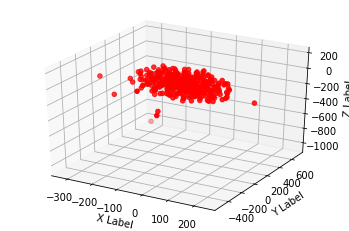

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

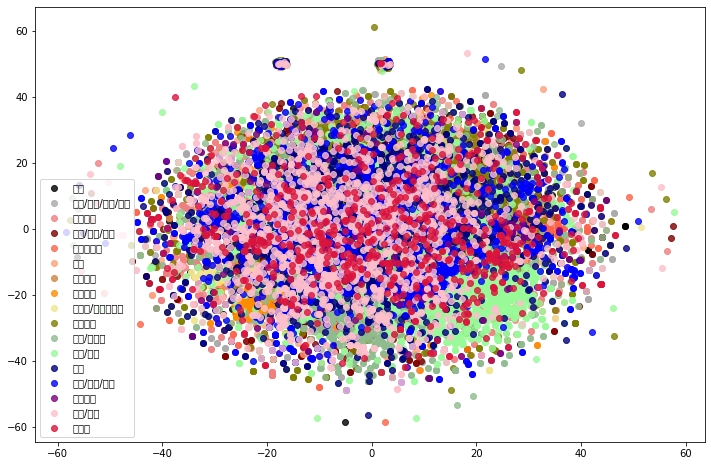

In [0]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == '미래'), 0],X_t[np.where(y1 == '미래'), 1], marker='o', color='black', linewidth='1', alpha=0.8, label='미래')
    plt.scatter(X_t[np.where(y1 == '문화/예술/체육/언론'), 0], X_t[np.where(y1 == '문화/예술/체육/언론'), 1], marker='o', color='darkgrey', linewidth='1', alpha=0.8, label='문화/예술/체육/언론')
    plt.scatter(X_t[np.where(y1 == '보건복지'), 0], X_t[np.where(y1 == '보건복지'), 1], marker='o', color='lightcoral', linewidth='1', alpha=0.8, label='보건복지')
    plt.scatter(X_t[np.where(y1 == '외교/통일/국방'), 0],X_t[np.where(y1 == '외교/통일/국방'), 1], marker='o', color='maroon', linewidth='1', alpha=0.8, label='외교/통일/국방')
    plt.scatter(X_t[np.where(y1 == '경제민주화'), 0], X_t[np.where(y1 == '경제민주화'), 1], marker='o', color='tomato', linewidth='1', alpha=0.8, label='경제민주화')
    plt.scatter(X_t[np.where(y1 == '행정'), 0], X_t[np.where(y1 == '행정'), 1], marker='o', color='lightsalmon', linewidth='1', alpha=0.8, label='행정')
    plt.scatter(X_t[np.where(y1 == '농산어촌'), 0],X_t[np.where(y1 == '농산어촌'), 1], marker='o', color='peru', linewidth='1', alpha=0.8, label='농산어촌')
    plt.scatter(X_t[np.where(y1 == '반려동물'), 0], X_t[np.where(y1 == '반려동물'), 1], marker='o', color='darkorange', linewidth='1', alpha=0.8, label='반려동물')
    plt.scatter(X_t[np.where(y1 == '저출산/고령화대책'), 0],X_t[np.where(y1 == '저출산/고령화대책'), 1], marker='o', color='khaki', linewidth='1', alpha=0.8, label='저출산/고령화대책')
    plt.scatter(X_t[np.where(y1 == '정치개혁'), 0], X_t[np.where(y1 == '정치개혁'), 1], marker='o', color='olive', linewidth='1', alpha=0.8, label='정치개혁')
    plt.scatter(X_t[np.where(y1 == '인권/성평등'), 0],X_t[np.where(y1 == '인권/성평등'), 1], marker='o', color='darkseagreen', linewidth='1', alpha=0.8, label='인권/성평등')
    plt.scatter(X_t[np.where(y1 == '육아/교육'), 0], X_t[np.where(y1 == '육아/교육'), 1], marker='o', color='palegreen', linewidth='1', alpha=0.8, label='육아/교육')
    plt.scatter(X_t[np.where(y1 == '기타'), 0],X_t[np.where(y1 == '기타'), 1], marker='o', color='navy', linewidth='1', alpha=0.8, label='기타')
    plt.scatter(X_t[np.where(y1 == '교통/건축/국토'), 0], X_t[np.where(y1 == '교통/건축/국토'), 1], marker='o', color='blue', linewidth='1', alpha=0.8, label='교통/건축/국토')
    plt.scatter(X_t[np.where(y1 == '성장동력'), 0],X_t[np.where(y1 == '성장동력'), 1], marker='o', color='purple', linewidth='1', alpha=0.8, label='성장동력')
    plt.scatter(X_t[np.where(y1 == '안전/환경'), 0],X_t[np.where(y1 == '안전/환경'), 1], marker='o', color='pink', linewidth='1', alpha=0.8, label='안전/환경')
    plt.scatter(X_t[np.where(y1 == '일자리'), 0],X_t[np.where(y1 == '일자리'), 1], marker='o', color='crimson', linewidth='1', alpha=0.8, label='일자리')
    
    
    plt.legend(loc='best')
    # plt.savefig(name)
    plt.show()
tsne_plot(docmodel[article_list], category_list, name='123')

In [0]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=3, random_state=0)
    X_t = tsne.fit_transform(x1)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X_t[np.where(y1 == '미래'), 0],X_t[np.where(y1 == '미래'), 1], X_t[np.where(y1 == '미래'), 2], marker='o', color='black', linewidth='1', alpha=0.8, label='미래')
    ax.scatter(X_t[np.where(y1 == '문화/예술/체육/언론'), 0], X_t[np.where(y1 == '문화/예술/체육/언론'), 1], X_t[np.where(y1 == '문화/예술/체육/언론'), 2], marker='o', color='darkgrey', linewidth='1', alpha=0.8, label='문화/예술/체육/언론')
    ax.scatter(X_t[np.where(y1 == '보건복지'), 0], X_t[np.where(y1 == '보건복지'), 1], X_t[np.where(y1 == '보건복지'), 2], marker='o', color='lightcoral', linewidth='1', alpha=0.8, label='보건복지')
    ax.scatter(X_t[np.where(y1 == '외교/통일/국방'), 0],X_t[np.where(y1 == '외교/통일/국방'), 1], X_t[np.where(y1 == '외교/통일/국방'), 2], marker='o', color='maroon', linewidth='1', alpha=0.8, label='외교/통일/국방')
    ax.scatter(X_t[np.where(y1 == '경제민주화'), 0], X_t[np.where(y1 == '경제민주화'), 1], X_t[np.where(y1 == '경제민주화'), 2], marker='o', color='tomato', linewidth='1', alpha=0.8, label='경제민주화')
    ax.scatter(X_t[np.where(y1 == '행정'), 0], X_t[np.where(y1 == '행정'), 1], X_t[np.where(y1 == '행정'), 2],marker='o', color='lightsalmon', linewidth='1', alpha=0.8, label='행정')
    ax.scatter(X_t[np.where(y1 == '농산어촌'), 0],X_t[np.where(y1 == '농산어촌'), 1], X_t[np.where(y1 == '농산어촌'), 2],marker='o', color='peru', linewidth='1', alpha=0.8, label='농산어촌')
    ax.scatter(X_t[np.where(y1 == '반려동물'), 0], X_t[np.where(y1 == '반려동물'), 1], X_t[np.where(y1 == '반려동물'), 2],marker='o', color='darkorange', linewidth='1', alpha=0.8, label='반려동물')
    ax.scatter(X_t[np.where(y1 == '저출산/고령화대책'), 0],X_t[np.where(y1 == '저출산/고령화대책'), 1], X_t[np.where(y1 == '저출산/고령화대책'), 2], marker='o', color='khaki', linewidth='1', alpha=0.8, label='저출산/고령화대책')
    ax.scatter(X_t[np.where(y1 == '정치개혁'), 0], X_t[np.where(y1 == '정치개혁'), 1], X_t[np.where(y1 == '정치개혁'), 2],marker='o', color='olive', linewidth='1', alpha=0.8, label='정치개혁')
    ax.scatter(X_t[np.where(y1 == '인권/성평등'), 0],X_t[np.where(y1 == '인권/성평등'), 1], X_t[np.where(y1 == '인권/성평등'), 2],marker='o', color='darkseagreen', linewidth='1', alpha=0.8, label='인권/성평등')
    ax.scatter(X_t[np.where(y1 == '육아/교육'), 0], X_t[np.where(y1 == '육아/교육'), 1], X_t[np.where(y1 == '육아/교육'), 2],marker='o', color='palegreen', linewidth='1', alpha=0.8, label='육아/교육')
    ax.scatter(X_t[np.where(y1 == '기타'), 0],X_t[np.where(y1 == '기타'), 1], X_t[np.where(y1 == '기타'), 2],marker='o', color='navy', linewidth='1', alpha=0.8, label='기타')
    ax.scatter(X_t[np.where(y1 == '교통/건축/국토'), 0], X_t[np.where(y1 == '교통/건축/국토'), 1],X_t[np.where(y1 == '교통/건축/국토'), 2], marker='o', color='blue', linewidth='1', alpha=0.8, label='교통/건축/국토')
    ax.scatter(X_t[np.where(y1 == '성장동력'), 0],X_t[np.where(y1 == '성장동력'), 1], X_t[np.where(y1 == '성장동력'), 2], marker='o', color='purple', linewidth='1', alpha=0.8, label='성장동력')
    ax.scatter(X_t[np.where(y1 == '안전/환경'), 0],X_t[np.where(y1 == '안전/환경'), 1], X_t[np.where(y1 == '안전/환경'), 2],marker='o', color='pink', linewidth='1', alpha=0.8, label='안전/환경')
    ax.scatter(X_t[np.where(y1 == '일자리'), 0],X_t[np.where(y1 == '일자리'), 1], X_t[np.where(y1 == '일자리'), 2],marker='o', color='crimson', linewidth='1', alpha=0.8, label='일자리')
    
    
    plt.legend(loc='best')
    plt.savefig(name)
    plt.show()


In [0]:
test = np.array(list(map(float, docmodel[article_list[0:2]])))

TypeError: ignored

In [0]:
test.shape

()

In [0]:
tsne_plot(test, category_list[0], name="graph.png")

ValueError: ignored

In [0]:
docmodel[article_list[0:100]].astype('float64')

array([[-4.37869596, -1.19599986,  1.62279403, ...,  2.34089398,
         4.11063242, -1.51040971],
       [ 2.40967679, -5.31095457,  0.77151948, ...,  1.57143211,
        -5.10931492, -8.20110321],
       [ 3.53443742, -0.534006  ,  2.52850699, ..., -0.47835967,
         1.99282444, -1.8312695 ],
       ...,
       [-1.87598956,  0.28115299,  5.45189285, ..., -2.63160372,
         2.01974678, -6.17580557],
       [ 4.28465509,  1.45152962, -0.11507496, ..., -0.64362633,
         8.95467567, -1.64241433],
       [ 0.21987103, -2.60945439, -0.22703981, ...,  9.65984726,
         3.01285505, -4.14508724]])

In [0]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0)

In [0]:
t

array([10.27029255, 10.73578471, 13.35180084, 12.74229717, 12.36683459,
        8.96319934,  8.24971548, 10.06086239,  8.84056677, 12.96062457,
       11.13505166, 12.29997254, 10.32854529, 12.29993006,  8.78870802,
        9.59864138, 13.14261   , 12.97918794,  7.97729402,  9.45409087,
       13.77918846,  7.68253188, 10.64807328,  9.72039274,  5.63345954,
        8.75583735,  9.59549194,  9.4891791 ,  8.87444778,  4.91233982,
        8.09869762,  9.93585039,  4.90346372, 11.79818926,  7.03001209,
        7.9954285 , 13.94598476,  4.90517186, 12.81329411, 12.49491556,
       10.88682161,  8.46370739, 11.00870506,  6.4271023 , 11.15775068,
       10.25982914, 13.01751978,  7.2315672 , 12.74848376,  5.64135288,
       14.01766071,  6.16031146, 12.37976709,  9.58057752, 13.49215611,
       13.86121919,  7.28697195, 12.34774873,  9.47215923, 11.25938251,
        7.24092365,  8.26165474,  9.84609453,  6.84670553,  6.99976172,
        5.85744822,  7.92261532, 14.0007499 ,  6.65588563,  5.03

In [0]:
color = (t - t.min()) / (t.max() - t.min())

In [0]:
X

array([[ -6.81276054,   5.2495719 ,  -7.68538892],
       [ -2.75777829,  18.40943431, -10.37553527],
       [  9.44084618,  19.3647404 ,   9.44145164],
       ...,
       [ 10.78993994,  19.19382401,  -5.46983904],
       [  1.88357404,   1.68294699,  13.87497132],
       [ -0.77030746,  19.99824378,   7.91361318]])

In [0]:
X=X_t

In [0]:
aa=df2['category'][:300]

In [0]:
len(aa)

300

In [0]:
from plotly.offline import plot
import plotly.graph_objs as go

In [0]:
data = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text = ['category:{}'.format(aa.iloc[i]) for i in range(len(aa))],
    mode='markers',
    marker=dict(
        size=3,
        color=color,
        colorscale='Jet',
        line=dict(
            #color='rgba(217, 217, 217, 0.14)',
            #color='rgb(217, 217, 217)',
            width=0.0
        ),
        opacity=0.8
    )
)
color

In [0]:
dfdf=pd.DataFrame({'x':X[:,0],'y':X[:,1],'z':X[:,2],'category':aa})

In [0]:
dfdf

,x,y,z,category
0,118.395325,-35.830727,86.462090,경제민주화
1,12.493712,133.840179,84.488739,기타
2,-71.717194,36.177235,56.221310,기타
3,43.542534,-159.934418,-69.900307,외교/통일/국방
4,-10.910457,-59.144855,151.167923,외교/통일/국방
...,...,...,...,...
295,-22.143650,4.712863,63.104248,저출산/고령화대책
296,-23.833788,-136.612534,-17.087543,저출산/고령화대책
297,-6.388117,21.266806,8.296157,저출산/고령화대책
298,-105.051552,-153.574387,64.524063,저출산/고령화대책


In [0]:
data = go.Scatter3d(dfdf,
    x='x', y='y', z='z',
                    color='category', symbol='category'
)

ValueError: ignored

In [0]:
layout = go.Layout(
    autosize=False,
    width=500,
    height=500,
    margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    #paper_bgcolor='#7f7f7f',
    #plot_bgcolor='#c7c7c7'
)

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [0]:
import plotly.express as px
df = px.data.iris()

In [0]:
type(df)

pandas.core.frame.DataFrame

In [0]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(dfdf, x='x', y='y', z='z',
                    color='category',size_max=18,symbol='cluster')
 #symbol='category'
fig.show()

In [0]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(dfdf, x='x', y='y', z='z',
                    color='cluster')
 #symbol='category'
fig.show()

In [0]:
transform = TSNE  # PCA
trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(x_t)




In [0]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=17, random_state=0).fit(X)
kmeans.labels_



array([ 0,  8, 14,  5,  6,  9,  9,  9,  8,  2,  8, 12,  1,  9,  9,  9,  4,
        1,  9,  2,  7,  9, 12,  1, 10, 14,  6,  8, 15,  6,  7,  1, 15,  5,
        2,  2,  9,  9,  7,  3, 10,  8,  5,  9, 15,  8, 12, 14,  2,  8, 12,
        7, 16,  6, 16,  2, 11, 16, 12, 10,  2,  7,  1,  9, 10,  9,  7,  8,
       10,  2, 11,  4, 12,  2,  7,  1,  1,  6, 16,  7,  6, 10,  5,  2, 12,
        4,  7,  7,  7,  2, 16,  2,  8,  0,  4,  5,  7, 16, 12, 16, 16,  4,
       14,  5,  8, 14, 16,  0, 14, 12,  1, 11,  1,  1,  1, 15,  6, 10,  8,
        1,  4, 14, 16, 11, 16,  1, 14,  1,  8, 14,  1,  6, 10, 16, 14, 16,
        0, 15, 10,  6, 14, 10,  8, 12, 14, 14,  6, 16, 10,  6, 14,  6,  9,
        4,  2, 12,  6,  5, 15,  1, 14, 16, 14,  5,  8, 10, 12,  2, 15, 14,
       15, 12,  1,  8,  0,  1, 10,  8,  2, 14,  1,  8, 12,  7,  0, 14,  2,
       10,  0,  2,  8,  8, 15, 12, 15, 12,  6, 10, 15,  0, 12,  9, 14,  8,
       14, 10, 14,  2, 10,  0,  0, 12, 15,  0,  0, 11,  0,  7,  7,  7,  5,
        2,  6,  4,  1,  0

In [0]:
cluster=pd.Series(kmeans.labels_)

In [0]:
dfdf['cluster']=cluster

In [0]:
dfdf

,x,y,z,category,cluster
0,118.395325,-35.830727,86.462090,경제민주화,0
1,12.493712,133.840179,84.488739,기타,8
2,-71.717194,36.177235,56.221310,기타,14
3,43.542534,-159.934418,-69.900307,외교/통일/국방,5
4,-10.910457,-59.144855,151.167923,외교/통일/국방,6
...,...,...,...,...,...
295,-22.143650,4.712863,63.104248,저출산/고령화대책,10
296,-23.833788,-136.612534,-17.087543,저출산/고령화대책,5
297,-6.388117,21.266806,8.296157,저출산/고령화대책,10
298,-105.051552,-153.574387,64.524063,저출산/고령화대책,11


In [0]:
df_3=df2.head(300)

In [0]:
df_3['cluster']=cluster

In [0]:
df_3

,article_id,start,end,answered,votes,category,title,content,cluster
0,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,0
1,34,2017-08-19,2017-09-18,0,679,기타,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...,8
2,37,2017-08-19,2017-09-18,0,415,기타,황우석박사님 연구재개 허용 촉구합니다.,국민의 70% 이상이 황우석박사님을 응원하고 지지하고 있습니다.\n*2007년 1월...,14
3,40,2017-08-19,2017-09-18,0,218,외교/통일/국방,국가유공자등 예우및 지우너에 관한 법률 시행령 개정,지금부터 67년전 1950년 6.25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...,5
4,41,2017-08-19,2017-09-18,0,227,외교/통일/국방,국가유공자등 예우및 지우너에 관한 법률 시행령 개정,지금부터 67년전 1950년 6.25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...,6
...,...,...,...,...,...,...,...,...,...
295,14539,2017-09-18,2017-10-18,0,223,저출산/고령화대책,난임지원,이번난임정책이의보지원이된다고해서 저같은난임환자들이얼마나환호했는지모릅니다..그래서1...,10
296,14556,2017-09-18,2017-10-18,0,354,저출산/고령화대책,저출산난임지원정책,난임정책 횟수제한 나이제한 이게 무슨 일인거죠?? 난임부부들 넘 정신적으로 경제적으...,5
297,14558,2017-09-18,2017-10-18,0,193,저출산/고령화대책,난임건강보험 나이제한 너무합니다~,왜 나이제한을 두는건지요~너무 불공평한거 아닌가요^^저희도 건강보험료 꼬박꼬박 내고...,10
298,14572,2017-09-18,2017-10-18,0,388,저출산/고령화대책,"난임 건강보험 적용- 나이제한, 횟수 제한 수정 부탁 드립니다.",이번 시행책을 접하고 설명할 수 없는 절망감에 빠져 있는 부부입니다.\n이번 정책관...,11


In [0]:
df_3['content'].iloc[295]

'이번난임정책이의보지원이된다고해서  저같은난임환자들이얼마나환호했는지모릅니다..그래서10월이오길꼬박기다렸는데기존정부지원받았던난임여성들은전혀해당사항이없더군요...다들멘붕의수렁에빠졌는데요  저도모두들다첨부터리셋되어기존정부지원받았던사람도 이제시작할난임여성들도모두들공평한정책일꺼라샙각했는데그게아니더란거죠...기존지원받았더란임여성들은한달에300에서많게는500되는돈을들여서임신이될지안될지도모를고가에시술을부담해야됩니다..된임신이1번에된다고누군가보장만해준다면500마넌이되수며1000마넌이대수일까요  문제는언제끌날지모를아기와의만남을이런식으로경제적부담을떠안고해야만한다는겁니다  아기를포기하지않고꼭만나려면요..적어도난임환자들은꼭아기를낳고싶어하는사람들인데  적어도이런사람들에게는도와주어야하는게아닐까요  인구절벽이다말만하면서왜꼭정작필요한곳에속시원한지원이안되는건지요  아이를낳아야나라가존속될텐데  국민없는나라가무슨의미인가요    가뜩이나조그만나라고인구도없고 주변은강대국으로둘러싸였는데  2년전부터이런정책이있다고들은거같은데그럼그2년동안세부적인내용은계획안하시고머하신건지요전국난임병원만조사해도신선4회냉동3회안에임신하신분들도계시겠지만안그런난임부부들이훨씬많습니다  왜꼭횟수와나이제한을두시는건가요   이거야말로난임부부들을더스트레시받게하는정책입니다 그안에꼭임신되야지안되면어쩌나...늘스트레스받아가면서합니다   그안에임신되지못하면안그래도자비가300에500정도는드는데경제적인금전비용이곱절이되니까요  아마도이런것들때문에결국포기하거나  빚더미에안ㅊ거나   흔들리고깨지는부부들도많습니다   이렇게더이상악순환을만들지말아주세요..저흰그저아이가너무간절히낳고싶을뿐인데 ....첫째만이라도낳을땐까진횟수나이제한두지않으시면안되나요..꼭아가를만나고싶은데돈때문에포기해야되는또는가정이깨어지는그런상황을만들지말아주세요..부탁드립니다...'

In [0]:
df_3['content'].iloc[296]

'난임정책 횟수제한 나이제한 이게 무슨 일인거죠?? 난임부부들 넘 정신적으로 경제적으로 맘적으로 너무 힘듭니다ㅠ 부탁드릴게요~~\\n제발 기회를 줘야 아이 한명이라도 낳을거 아닙니까ㅠ 저번 정권에서 실망감이 이번 정권에서 기대감으로 부풀었던 저희 부부를 포함한 많은 난임부부들.. 진짜 스트레스들 때문에 지금 채취하고 이식받는 시술과정에서 막대한 손실과 실패들이 넘쳐납니다ㅠ 이게 도대체 뭡니까?? 저출산 난임정책 이건 무조건적인 정부의 협조와 배려 그리고 전폭적인 지원이 필요한 부분입니다...일자리도 사람이 있어야 일자리가 있는거죠...아기들이 없는데 사람들이 없는데 장차 학교며 학생이며 선생님이며 공무원이며 소방관이며 등등 이런 일자리창출이 무슨 의미가 있습니까??  나무보다 숲을 보는 안목과 정책으로 나라를 복지라는 이름으로 이끌어가시길 바라며, 희망의 끈을 놓지 않고, 국가와 국민을 먼저 생각하는... 사람이 먼저다 라는 사명감의 답변 부탁드립니다.'

In [0]:
df_3['content'].iloc[297]

'왜 나이제한을 두는건지요~너무 불공평한거 아닌가요^^저희도 건강보험료 꼬박꼬박 내고 있는데·저희는 사람이 아닌가요~왜 나이로 차별을 두는건지^^우리부부 아직 첫째 아이도  만나질 못했는데~ 제발 첫째아이만이라도 나이제한,횟수제한 폐지해주세요! 이게 아니면 나이제한 늘려주세요!!'

In [0]:
cluster.value_counts()

10    28
14    24
2     24
8     23
1     23
12    22
6     20
11    20
9     20
7     18
16    17
15    17
0     17
5     13
4     11
13     2
3      1
dtype: int64

In [0]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
                    color='petal_length', symbol='species')
fig.show()

In [0]:
fig = go.Figure(data=[data], layout=layout)

In [0]:
from plotly.offline import plot, iplot
iplot(fig)

In [0]:
from sklearn.manifold import TSNE